아래의 코드에서 사용될 패키지들 입니다. \
없으면 미리 다운로드 받으시면 흐름 끊기지 않고 진행 가능합니다.

참고로 맥북이나 리눅스의 경우 visualization 파트에서 막힐 가능성이 높은데 \
미리 확인해보고 잘 안될 것 같으면 윈도우로 코드 돌리시는걸 추천합니다. 

In [1]:
# #기본
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# #토크나이징
# from konlpy.tag import Okt

# #Word 2 Vector
# from gensim.models import Word2Vec

# #visualization
# import networkx as nx
# import matplotlib.font_manager as fm
# import matplotlib

prepare dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/mglee/VSCODE/git_folder/coupang/data/coupang_naver_monthlyTop4000_body.csv", encoding='utf-8', index_col=0)

In [4]:
df.columns = ['url', 'title', 'body']

In [5]:
df

,url,title,body
0,https://n.news.naver.com/mnews/article/119/000...,알림 꺼도 계속 뜨는 ‘팝업창’…교묘한 압박 상술 다크패턴 맹추격④,[\n상품 주문만 하고 싶은데 슬쩍 뜨는 팝업국내 전자상거래 앱 97% 다크패턴 발...
1,https://n.news.naver.com/mnews/article/119/000...,"가족사진, 무료 촬영이라더니…‘인화’ 추가비용에 당했다 다크패턴 맹추격③","[\n소비자 빈틈 노린 ‘꼼수 마케팅’ 기승소비자원, 사진촬영 상담 해마다 2천건1..."
2,https://n.news.naver.com/mnews/article/032/000...,"“이런 유형이 눈속임 상술입니다” 공정위, ‘다크패턴’ 잡는다",[\n\n\n\n\n관련 이미지. 경향DB#A씨는 가입만 하면 30일 무료 체험할 ...
3,https://n.news.naver.com/mnews/article/020/000...,“나도 모르게 자동결제-유료전환”… 소비자 눈속임 ‘다크 패턴’ 규제,"[\n공정위, 19개 유형 분류… 법개정 추진최근 인도네시아 발리로 여행을 다녀온 ..."
4,https://n.news.naver.com/mnews/article/366/000...,당정 “다크패턴 근절 법적 근거 위해 전자상거래법 개정”,[\n상반기엔 다크패턴 방지 가이드라인 배포하반기엔 다크패턴 사업별 실태 비교·분석...
...,...,...,...
478,https://n.news.naver.com/mnews/article/028/000...,업계 최초라서가 아니다…구글·아이폰의 성공 비결은 ‘이것’,[\n\t\t\t [한겨레] [27돌 창간 기획] 사람 중심 스마트시대로\n\n\n...
479,https://n.news.naver.com/mnews/article/028/000...,배달의 한겨레 ‘폭염’에 가장 취약한 도시는?,[\n\t\t\t [한겨레] 8월 4일 뉴스 브리핑\n\n\n\n&lt;디지털 한겨...
480,https://n.news.naver.com/mnews/article/277/000...,올 가을 트렌드 '록시크(Rock Chic)'를 아시나요?,[\n\n\n\n\n\n\n[아시아경제 박소연 기자]지난 10일 독특한 디자인의 영...
481,https://n.news.naver.com/mnews/article/111/000...,"패셔니★, 올가을에는 '블랙컬러 + 록스타' 유행",[\n\n\n\n\n\n\n&lt;조이뉴스24&gt;패션쇼에서 만난 패셔니스타들의 ...


추가적으로 민원을 통쨰로 제거할 필요가 있는 경우 \
이 부분에 코드를 추가하세요

In [6]:
text = df['body']

In [7]:
text

0      [\n상품 주문만 하고 싶은데 슬쩍 뜨는 팝업국내 전자상거래 앱 97% 다크패턴 발...
1      [\n소비자 빈틈 노린 ‘꼼수 마케팅’ 기승소비자원, 사진촬영 상담 해마다 2천건1...
2      [\n\n\n\n\n관련 이미지. 경향DB#A씨는 가입만 하면 30일 무료 체험할 ...
3      [\n공정위, 19개 유형 분류… 법개정 추진최근 인도네시아 발리로 여행을 다녀온 ...
4      [\n상반기엔 다크패턴 방지 가이드라인 배포하반기엔 다크패턴 사업별 실태 비교·분석...
                             ...                        
478    [\n\t\t\t [한겨레] [27돌 창간 기획] 사람 중심 스마트시대로\n\n\n...
479    [\n\t\t\t [한겨레] 8월 4일 뉴스 브리핑\n\n\n\n&lt;디지털 한겨...
480    [\n\n\n\n\n\n\n[아시아경제 박소연 기자]지난 10일 독특한 디자인의 영...
481    [\n\n\n\n\n\n\n&lt;조이뉴스24&gt;패션쇼에서 만난 패셔니스타들의 ...
482    [\n\n\n\n\n\n사진출처: 릴리젼\n[패션팀] 영국 브랜드 릴리젼의 론칭 행...
Name: body, Length: 483, dtype: object

Tokenizing

토크나이징에는 konlpy의 Okt를 사용합니다. \
패키지가 없으면 다운로드 받으시고, 다른 pos tagger를 사용하고 싶으시면 수정하세요

In [8]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

In [9]:
def tokenizing(x):
    lst = []
    for item in tqdm(x):
        if len(str(item)) > 9999000:
            lst.append(["Too Long"])
        else:
            lst.append(okt.nouns(str(item)))
    return lst

In [10]:
#민원에 양에 따라 시간이 조금 걸릴 수도 있습니다.
#민원의 길이가 1000글자 이상일 경우 토크나이징을 수행하지 않고 Too Long이라는 토큰으로 대치합니다.
tokens = tokenizing(text)

100%|██████████| 483/483 [00:26<00:00, 18.00it/s]


In [11]:
t_split = text.apply(lambda x : x.split(' '))

In [12]:
#tokens[0]

stopwords 제거하고 싶으면 여기서 하세요

Word 2 Vector : Target keyword랑 유사한 의미 좌표에 위치하는 keyword를 발견

In [35]:
from gensim.models import Word2Vec

In [36]:
# input, 모델크기, 주변 몇단어까지 학습할지, 최소 등장 횟수, worker수
model = Word2Vec(tokens, window=64, min_count=5, workers= 8)

In [37]:
model2 = Word2Vec(t_split, window=64, min_count=5, workers= 8)

In [93]:
print(model.wv.similarity('다크패턴', '쿠팡'), 
      model.wv.similarity('다크패턴', '네이버'), 
      model.wv.similarity('다크패턴', '카카오'),
      model.wv.similarity('다크패턴', '인스타그램'),
      model.wv.similarity('다크패턴', '페이스북'))

-0.13777317 -0.041468907 -0.55233073 -0.0129450075 0.1109706


In [94]:
model.wv.most_similar('쿠팡', topn = 100)

[('셈', 0.892312228679657),
 ('통신비', 0.8822368383407593),
 ('본사', 0.8811333179473877),
 ('먹기', 0.8771657943725586),
 ('점주', 0.8439561128616333),
 ('재차', 0.8424067497253418),
 ('이유', 0.8410395979881287),
 ('인상', 0.8273404240608215),
 ('공격', 0.8273276686668396),
 ('크게', 0.8269877433776855),
 ('역시', 0.826731264591217),
 ('폭', 0.8190212845802307),
 ('원금', 0.8162203431129456),
 ('겨자', 0.8142596483230591),
 ('유지', 0.8138477206230164),
 ('지로', 0.8113710880279541),
 ('대리점', 0.8069417476654053),
 ('얘깃', 0.8057777881622314),
 ('관계자', 0.8034549951553345),
 ('모씨', 0.7993304133415222),
 ('미담', 0.7989382743835449),
 ('페스티벌', 0.7909756898880005),
 ('노컷뉴스', 0.7864872813224792),
 ('폭발', 0.7837137579917908),
 ('불만', 0.7834455370903015),
 ('건', 0.7799131870269775),
 ('적자', 0.7774317860603333),
 ('인하', 0.7753441333770752),
 ('모양새', 0.7739951610565186),
 ('매달', 0.7725414037704468),
 ('한국은행', 0.7698013782501221),
 ('달', 0.768896222114563),
 ('업계', 0.7654410004615784),
 ('제각각', 0.7635457515716553),
 ('대리', 0.

Visualization

In [48]:
import networkx as nx

키워드 네트워크를 통해 시각화

In [49]:
g = nx.Graph()
g2 = nx.Graph()

In [1]:
center_keyword = '다크패턴' #이 민원이 무엇을 키워드로 뽑은 민원인지 적어주면 됩니다.
depth1 = model.wv.most_similar(center_keyword, topn=30)
depth1_2 = model2.wv.most_similar(center_keyword, topn=30)

NameError: name 'model' is not defined

In [51]:
for node, weight in depth1:
    g.add_edge(center_keyword, node, weight = weight)
    
for node, weight in depth1_2:
    g2.add_edge(center_keyword, node, weight = weight)

In [52]:
nodes = list(g.nodes())
nodes.remove(center_keyword)

nodes2 = list(g2.nodes())
nodes2.remove(center_keyword)

In [53]:
depth2 = {}
depth2_2 = {}

for node in nodes:
    temp = model.wv.most_similar(node, topn = 5)
    depth2[node] = temp

for node in nodes2:
    temp = model2.wv.most_similar(node, topn = 5)
    depth2_2[node] = temp

In [54]:
for key in depth2.keys():
    for node, weight in depth2[key]:
        g.add_edge(key, node, weight=weight)
        
for key in depth2_2.keys():
    for node, weight in depth2_2[key]:
        g2.add_edge(key, node, weight=weight)

In [75]:
len(g.nodes())

150

In [62]:
nodes_d2 = list(g.nodes())
for n in nodes:
    nodes_d2.remove(n)

nodes_d2_2 = list(g2.nodes())

for n in nodes2:
    nodes_d2_2.remove(n)

In [63]:
depth3 = {}
depth3_2 = {}

for node in nodes_d2:
    temp = model.wv.most_similar(node, topn = 5)
    depth3[node] = temp

for node in nodes_d2_2:
    temp = model2.wv.most_similar(node, topn = 5)
    depth3_2[node] = temp

In [64]:
for key in depth3.keys():
    for node, weight in depth3[key]:
        g.add_edge(key, node, weight=weight)
        
for key in depth3_2.keys():
    for node, weight in depth3_2[key]:
        g2.add_edge(key, node, weight=weight)

맥북이나 리눅스의 경우 기본적으로 plt에서 지원하는 한글폰트가 없습니다. 

'맥북 plt 한글' 등으로 검색해서 다운로드 받아서 아래의 코드를 실행하거나 

윈도우를 쓰는 친한 친구에게 그냥 코드 돌려달라고 부탁해보세요

In [65]:
import matplotlib.font_manager as fm
import matplotlib

#Change font path fit to your enviroment
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

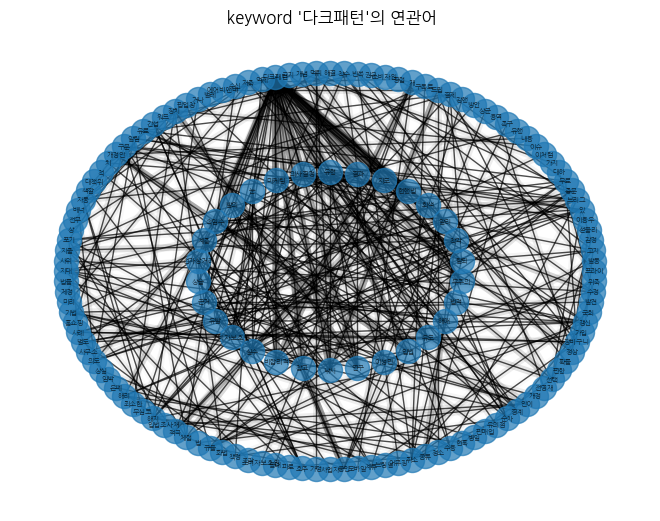

In [87]:
import numpy as np

pos = nx.shell_layout(g, [nodes, set(g.nodes) - set(nodes)])
#labels = nx.get_edge_attributes(g, 'weight')
cent=nx.edge_betweenness_centrality(g)
nx.draw(g, pos = pos, with_labels = True, font_family = font_name, font_size = 5, alpha = 0.7)
#nx.draw_networkx_edge_labels(g, edge_labels=labels, font_size = 3, pos = pos)
[nx.draw_networkx_edges(g ,pos=pos,edgelist=[key],alpha=np.amin([value*5,1]),width=5) for key,value in cent.items()]
matplotlib.pyplot.title(" keyword '다크패턴'의 연관어")

matplotlib.pyplot.savefig(f"./다크패턴.png", format="PNG", dpi = 1000)


# pos = nx.kamada_kawai_layout(g2)
# #labels = nx.get_edge_attributes(g2, 'weight')
# cent=nx.edge_betweenness_centrality(g2)
# nx.draw(g2, pos = pos, with_labels = True, font_family = font_name, font_size = 5, alpha = 0.7)
# [nx.draw_networkx_edges(g2 ,pos=pos,edgelist=[key],alpha=np.amin([value*10,1]),width=5) for key,value in cent.items()] 

# matplotlib.pyplot.savefig(f"./다크패턴2.png", format="PNG", dpi = 1000)

민원을 추출할때 사용한 타겟 키워드를 중심으로 2 depth의 키워드 네트워크를 생성하여 \
추출된 민원의 키워드와 동시 출현 연관성이 높은 키워드들을 확인할 수 있습니다.

예를 들어 "쿠팡"과 관련된 민원에는 티몬, 11번가, 스팸 등의 키워드들이 자주 함께 등장하는 것을 볼 수 있습니다.